# Отчёт по производительности для задания №7 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

text = Path("../Results/7_log.txt").read_text(encoding="utf-8")
pd.set_option('display.max_rows', 150)

size_re = re.compile(r"Vector size:\s*(\d+)")
method_re = re.compile(r"Method:\s*(\w+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"Time:\s*([\d.]+)\s*ms\s*\(speedup:\s*([\d.]+)x,\s*efficiency:\s*([\d.]+)\)")

records = []
current_size = None
current_method = None

lines = text.splitlines()
i = 0
while i < len(lines):
    line = lines[i].strip()

    if line.startswith("Vector size:"):
        m = size_re.search(line)
        if m:
            current_size = int(m.group(1))
        i += 1
        continue

    if line.startswith("Method:"):
        m = method_re.search(line)
        if m:
            current_method = m.group(1)
        i += 1
        continue

    m_threads = threads_re.search(line)
    if m_threads:
        threads = int(m_threads.group(1))
        i += 1
        if i < len(lines):
            m_time = time_re.search(lines[i].strip())
            if m_time:
                time_ms = float(m_time.group(1))
                speedup = float(m_time.group(2))
                efficiency = float(m_time.group(3))
                records.append({
                    'size': current_size,
                    'method': current_method,
                    'threads': threads,
                    'time_ms': time_ms,
                    'speedup': speedup,
                    'efficiency': efficiency
                })
        i += 1
        continue

    i += 1

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df


Rows: 96


,size,method,threads,time_ms,speedup,efficiency
0,500000,reduction,1,1.281530,1.000000,1.000000
1,500000,reduction,2,0.527028,2.431610,1.215810
2,500000,reduction,4,0.280514,4.568500,1.142120
3,500000,reduction,6,0.316305,4.051560,0.675260
4,500000,reduction,8,0.214487,5.974860,0.746858
5,500000,reduction,12,0.253611,5.053120,0.421093
6,500000,atomic,1,4.165040,1.000000,1.000000
7,500000,atomic,2,8.111110,0.513498,0.256749
8,500000,atomic,4,17.055800,0.244200,0.061050
9,500000,atomic,6,28.176400,0.147820,0.024637


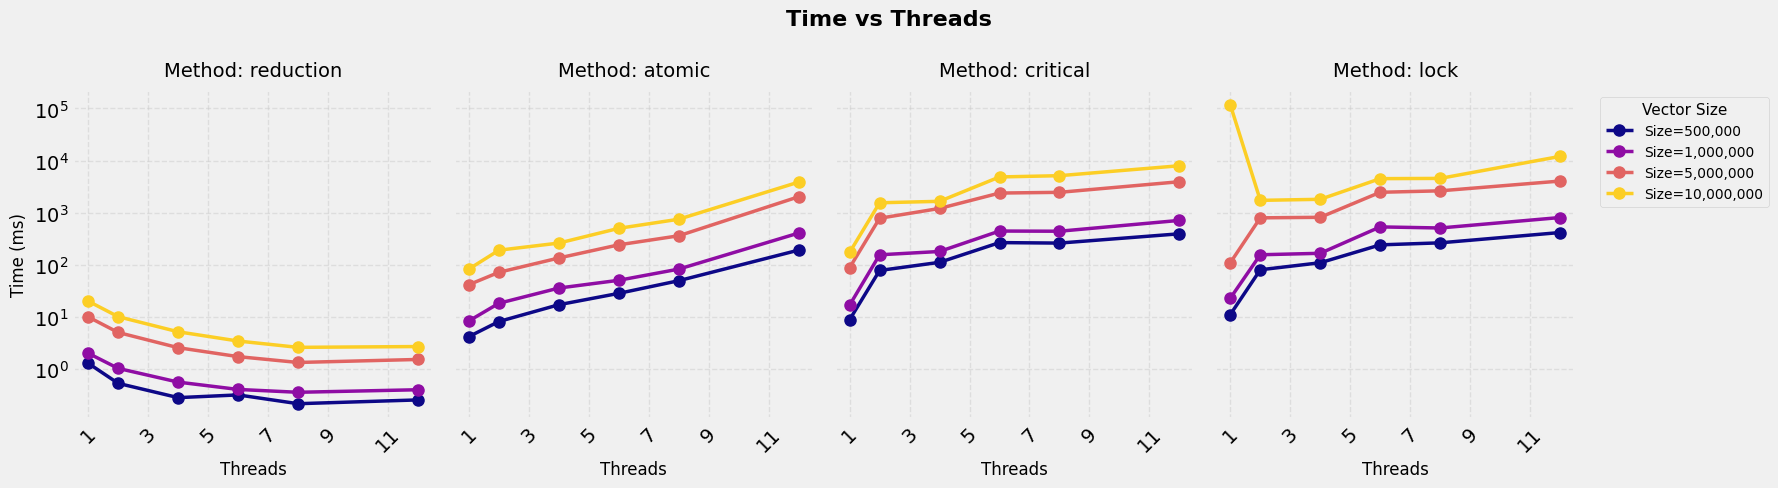

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

unique_methods = df['method'].unique()
unique_sizes = sorted(df['size'].unique())
labels = [f"{s:,}" for s in unique_sizes]  
colors = plt.cm.plasma(np.linspace(0, 0.9, len(unique_sizes)))  

fig, axs = plt.subplots(1, len(unique_methods), figsize=(18, 5), sharey=True)
if len(unique_methods) == 1:
    axs = [axs]

for col_idx, method in enumerate(unique_methods):
    ax = axs[col_idx]
    for idx, size in enumerate(unique_sizes):
        sub = df[(df['method'] == method) & (df['size'] == size)].sort_values('threads')
        if not sub.empty:  
            ax.plot(sub['threads'], sub['time_ms'], 'o-', 
                   color=colors[idx], 
                   linewidth=2.5,  
                   markersize=8,   
                   label=f"Size={size:,}")  

    ax.set_title(f'Method: {method}', fontsize=14, pad=10)
    ax.set_xlabel('Threads', fontsize=12)
    if col_idx == 0:
        ax.set_ylabel('Time (ms)', fontsize=12)

    ax.set_yscale('log')

    max_threads = df['threads'].max()
    ax.set_xticks(range(1, max_threads + 1, 2))  # Более частые метки
    ax.set_xticklabels(range(1, max_threads + 1, 2), rotation=45)  # Поворот меток
    ax.set_xlim(0.5, max_threads + 0.5)

    ax.grid(True, alpha=0.5, linestyle='--')  # Изменен стиль сетки

# Перемещена легенда и улучшено оформление
if len(unique_methods) > 1:
    axs[-1].legend(title='Vector Size', bbox_to_anchor=(1.05, 1), loc='upper left', 
                  fontsize=10, title_fontsize=11)
else:
    axs[0].legend(title='Vector Size', loc='upper right', fontsize=10, title_fontsize=11)

plt.suptitle('Time vs Threads', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

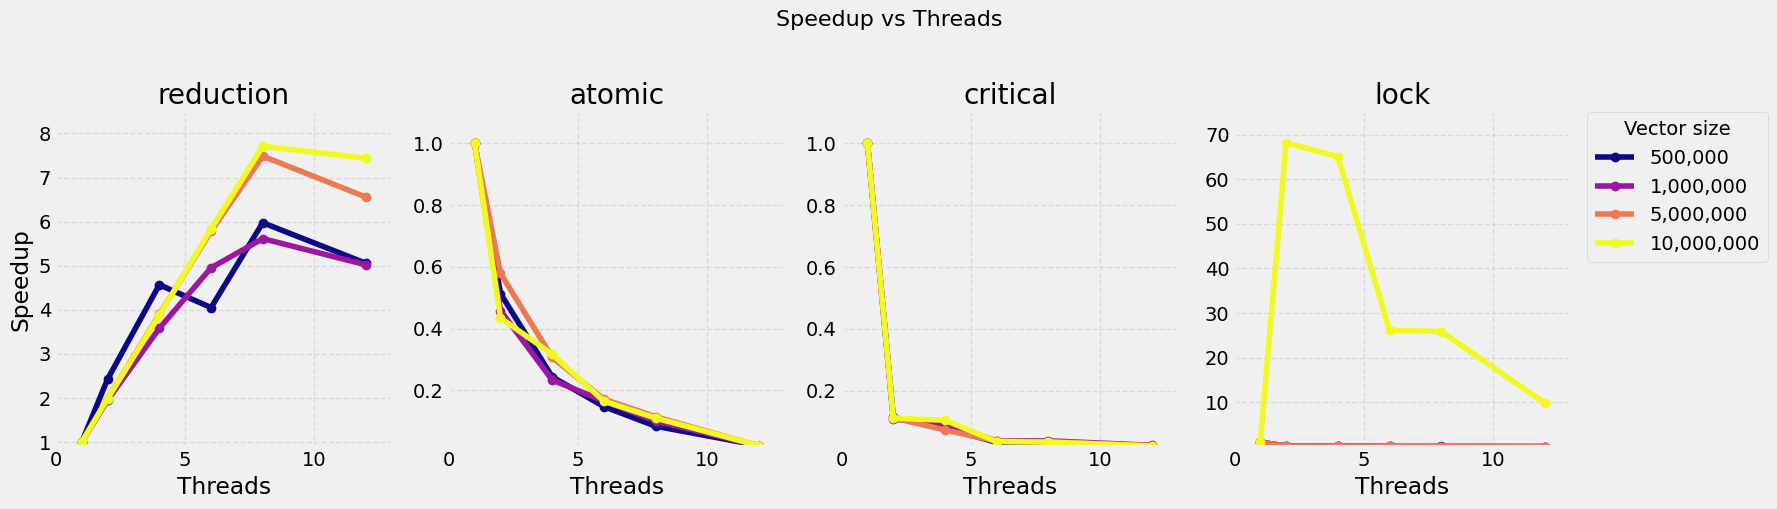

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

methods = df['method'].unique()
vector_sizes = sorted(df['size'].unique())
color_palette = plt.cm.plasma(np.linspace(0, 1, len(vector_sizes)))
max_thread_count = df['threads'].max()

fig, axes = plt.subplots(1, len(methods), figsize=(18, 5), sharey=False)
if len(methods) == 1:
    axes = [axes]

for ax_idx, method_name in enumerate(methods):
    current_ax = axes[ax_idx]
    
    for color_idx, size_value in enumerate(vector_sizes):
        filtered_data = df[(df['method'] == method_name) & 
                           (df['size'] == size_value)].sort_values('threads')
        
        current_ax.plot(filtered_data['threads'], 
                       filtered_data['speedup'], 
                       'o-', 
                       color=color_palette[color_idx], 
                       label=f"{size_value:,}")
    
    current_ax.set_title(f'{method_name}')
    current_ax.set_xlabel('Threads')
    
    if ax_idx == 0:
        current_ax.set_ylabel('Speedup')
    
    thread_ticks = np.arange(0, max_thread_count + 1, 5)
    current_ax.set_xticks(thread_ticks)
    current_ax.set_xlim(0, max_thread_count + 1)
    
    method_data = df[df['method'] == method_name]['speedup']
    y_lower = method_data.min() * 0.9
    y_upper = method_data.max() * 1.1
    current_ax.set_ylim(y_lower, y_upper)
    
    current_ax.grid(True, alpha=0.6, linestyle='--')

axes[-1].legend(title='Vector size', 
                bbox_to_anchor=(1.05, 1), 
                loc='upper left',
                borderaxespad=0)

plt.suptitle('Speedup vs Threads', 
             fontsize=16, 
             y=1.02)

plt.tight_layout()
plt.show()

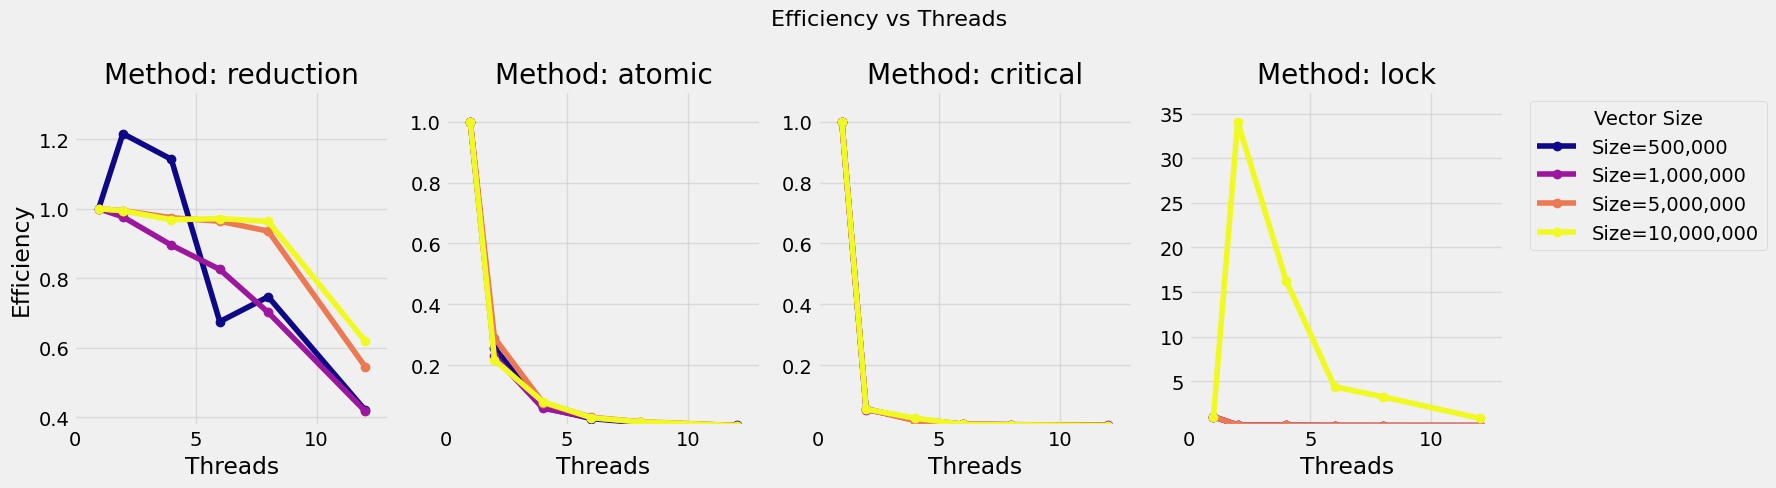

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
unique_methods = df['method'].unique()
unique_sizes = sorted(df['size'].unique())
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_sizes)))

fig, axs = plt.subplots(1, len(unique_methods), figsize=(18, 5), sharey=False)
if len(unique_methods) == 1:
    axs = [axs]

for col_idx, method in enumerate(unique_methods):
    ax = axs[col_idx]
    for idx, size in enumerate(unique_sizes):
        sub = df[(df['method'] == method) & (df['size'] == size)].sort_values('threads')
        ax.plot(sub['threads'], sub['efficiency'], 'o-', color=colors[idx], label=f"Size={size:,}")

    ax.set_title(f'Method: {method}')
    ax.set_xlabel('Threads')
    if col_idx == 0:
        ax.set_ylabel('Efficiency')

    max_threads = df['threads'].max()
    ax.set_xticks(np.arange(0, max_threads + 1, 5))
    ax.set_xlim(0, max_threads + 1)

    ymin = df[df['method'] == method]['efficiency'].min() * 0.9
    ymax = df[df['method'] == method]['efficiency'].max() * 1.1
    ax.set_ylim(ymin, ymax)

    ax.grid(True, alpha=0.6)

axs[-1].legend(title='Vector Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Efficiency vs Threads', fontsize=16)
plt.tight_layout()
plt.show()


## Методы редукции

* **Reduction** — автоматическое создание локальных копий переменной для каждого потока с последующим объединением. Эффективно масштабируется, минимальные накладные расходы.
* **Atomic** — атомарное обновление общей переменной. Работает медленно при частых обновлениях из-за ожидания потоков.
* **Critical** — критическая секция, один поток в блоке одновременно. Сильно тормозит при многопоточности.
* **Lock** — ручное управление блокировкой, аналогично **Critical**, накладные расходы даже выше.

**Reduction** почти идеально масштабируется, а **Atomic**, **Critical**, **Lock** тормозят, потому что потоки часто ждут друг друга при обновлении общей суммы.